In [5]:
import pandas as pd

import numpy as np

import warnings

warnings.filterwarnings('ignore')


In [6]:
df = pd.read_csv('/content/Advertising.csv')


In [8]:
df.head(500)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [9]:
df.shape

(200, 5)

In [12]:
df.columns.values.tolist()


['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [14]:
df.info(500)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


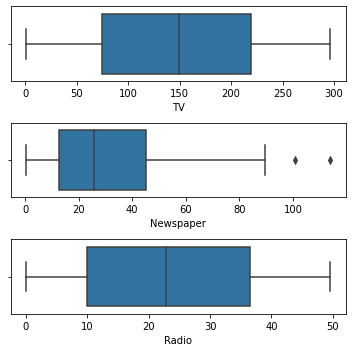

In [26]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()



<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

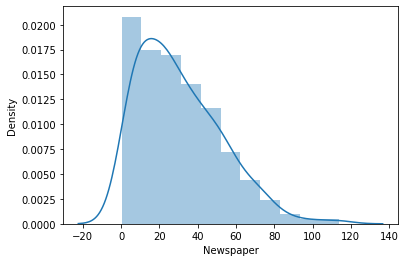

In [27]:
sns.distplot(df['Newspaper'])


In [28]:
igr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)


In [30]:
lower_bridge = df["Newspaper"].quantile(0.25) - (igr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (igr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
93.625


In [31]:
data = df.copy()

In [32]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93


<AxesSubplot:xlabel='Newspaper'>

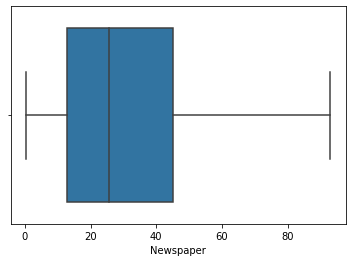

In [33]:
sns.boxplot(data[ 'Newspaper'])


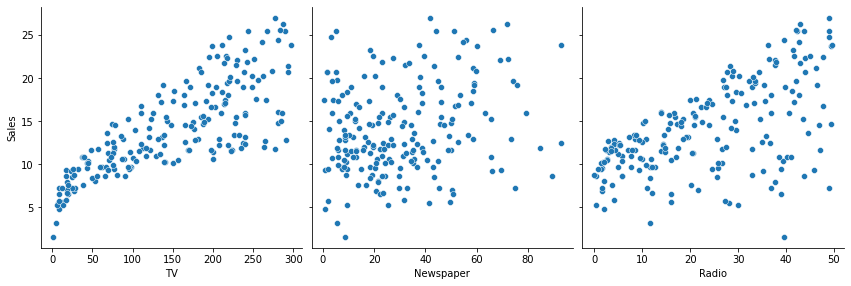

In [34]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
      y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()


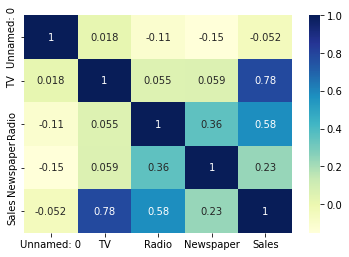

In [35]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()


In [36]:
important_features = list(df.corr()['Sales'][(df.corr()[ 'Sales' ]>+0.5)|(df.corr()[ 'Sales' ]<-0.5)].index)


In [38]:
print(important_features)

['TV', 'Radio', 'Sales']


In [40]:
X = data['TV']
Y = data['Sales']


In [41]:
X = X.values.reshape(-1,1)

In [42]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [43]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [45]:
print(X.shape,Y.shape)


(200, 1) (200,)


In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33)


In [48]:
print(X_train.shape,Y_train.shape)


(134, 1) (134,)


In [61]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [62]:
knn = KNeighborsRegressor().fit(X_train, Y_train)
knn


KNeighborsRegressor()

In [68]:
knn_train_pred = knn.predict(X_train)


In [74]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE", "Variance"])


In [72]:
knn_test_pred  = knn.predict(X_test)

In [75]:
print(knn_train_pred, knn_test_pred)

[14.86  6.96 18.54 11.14 16.2  17.04  9.9   9.86 13.68 11.14 19.7   7.3
 17.72 16.78 17.52 12.48 18.9  19.84 18.3   4.58 11.32 15.42  9.9  11.32
  8.26  8.26 11.44 15.14 11.14 16.1  18.84 19.76  6.68  7.3  19.88  9.86
 19.84  8.26 19.84 19.7  17.04 12.96 16.5  20.22 18.3  17.94 19.84 11.42
 20.2  10.36 15.92 10.5  21.78 10.92  7.3  15.14 17.98 15.42 11.12 17.52
 15.44 19.7  13.08 11.14 18.92 20.2  21.16 16.46 20.22  5.92  8.26 11.42
 14.7  10.06 14.72 13.68 15.94 17.52 13.06  9.64 12.48 14.46 11.12 14.88
  6.96 19.68 15.14 14.3   5.32 12.3   6.96 11.42 17.98 10.5  11.44 16.32
  4.58 18.54 21.16 17.8  16.2  12.3  13.16 17.02 13.68 13.08 11.12 16.78
 13.62 14.46 17.04  4.58 11.12 15.14  7.88 11.44  6.68 14.26 17.16 17.72
 10.5  16.78 15.92 22.5  18.92 20.84 11.14  7.88 21.78 15.9  19.84 17.16
 15.14 16.96] [16.54  5.32  7.88 20.84 17.04 11.14 11.12 19.5  11.76 17.8  13.68 16.56
 14.72 14.72 13.7  10.5  19.54 14.02  6.96 11.44  9.86  9.64 13.08 16.2
 19.68 19.5   5.32 11.12 11.6  14.26 10

In [86]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse),

R2: 0.4855415905774111
RMSE: 3.4564686831469715


(None,)

In [87]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.661482,0.485542,3.456469,0.17594


In [90]:
svr = SVR().fit(X_train,Y_train)
svr

SVR()

In [92]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [93]:
print(svr_train_pred,svr_test_pred)

[14.06889773  7.96832028 16.69999987 11.01253278 17.69155161 15.53298442
 10.3788812   9.37547737 14.53687888 10.92163267 17.33736091  7.90965936
 17.72424664 17.71053242 17.382906   11.39999993 17.31425576 17.65888461
 17.33436528  7.54627091 11.69932137 15.75652366 10.5591143  11.57854782
  8.24826271  8.19098004 12.28285672 16.74497491 10.86286498 15.93211444
 17.12545265 17.28075596  7.76955874  7.90965936 17.29117068  9.3884082
 17.71906348  8.27756002 17.67511241 17.40730537 15.40343738 17.52639685
 16.23588912 17.25430947 17.33187295 16.46736908 17.70640877 11.46201226
 17.1443162   9.2790732  15.66640955  9.05870112 17.05739845 12.47021455
  7.93663119 16.77576892 17.00452045 15.85812534 12.65615543 17.42665672
 17.64633646 17.41880548 14.86774205 10.96066941 17.37816523 17.17325812
 17.23222494 16.14825836 17.23545406  7.7233983   8.25311562 11.46818819
 14.29838499  9.73633155 13.28432634 14.49789801 17.61130927 17.42665672
 13.13450198 10.2381502  11.38754294 14.16034708 12.

In [95]:
r2 = r2_score(Y_test,svr_test_pred)
r2_train = r2_score(Y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse),

R2: 0.5987798201483074
RMSE: 3.052452223553541


(None,)

In [96]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.661482,0.485542,3.456469,0.175940
1,Support Vector Machine,0.661482,0.485542,3.456469,0.175940
2,Support Vector Machine,0.577323,0.598780,3.052452,-0.021457


In [97]:
import statsmodels.api as sm


In [98]:
X_train_constant = sm.add_constant(X_train)


In [100]:
model = sm.OLS(Y_train, X_train_constant).fit()


In [102]:
model.params


const    7.125077
x1       0.048097
dtype: float64

In [103]:
print(model.summary ())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     199.4
Date:                Wed, 08 Mar 2023   Prob (F-statistic):           3.69e-28
Time:                        18:53:40   Log-Likelihood:                -353.87
No. Observations:                 134   AIC:                             711.7
Df Residuals:                     132   BIC:                             717.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1251      0.581     12.269      0.0

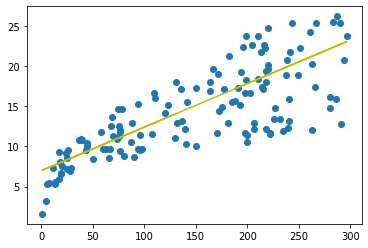

In [106]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [112]:
y_train_pred = model.predict(X_train_constant)
res = (Y_train - y_train_pred)
res


73    -2.348801
189   -1.324487
96    -4.929001
18     0.846625
104    2.118269
         ...   
40    -0.264676
25    -7.769721
85    -1.217375
70     1.598854
154   -0.557653
Name: Sales, Length: 134, dtype: float64

In [113]:
y_train_pred

array([13.34880081,  8.02448712, 16.6290013 , 10.45337458, 18.58173062,
       15.14762044,  9.99164548,  9.26538408, 13.92115251, 10.38603909,
       20.76532449,  7.95234195, 18.75006936, 18.67311451, 17.73041759,
       10.74676495, 17.59574661, 19.96210825, 17.63422403,  7.32227412,
       10.98243917, 15.42177209, 10.12150679, 10.88624561,  8.32749685,
        8.26978071, 11.47302634, 16.69152712, 10.34275198, 15.63820761,
       17.26387881, 17.53322079,  7.75995483,  7.95234195, 17.5524595 ,
        9.27500344, 19.69276627,  8.35635491, 19.89958243, 20.62584383,
       14.98890106, 18.05266603, 16.01817218, 17.48512401, 17.62941435,
       16.31637222, 19.76010177, 10.79486173, 21.10681164,  9.19323891,
       15.31114949,  9.02490017, 21.24629231, 11.64136508,  7.9860097 ,
       16.73481422, 17.07149169, 15.54682372, 11.81451349, 17.82180148,
       18.40377253, 20.60179544, 14.32997515, 10.41489715, 17.72079824,
       21.05871486, 20.95771162, 15.90754958, 17.45145626,  7.68

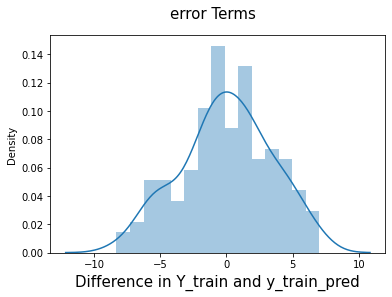

In [114]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('error Terms', fontsize = 15)
plt.xlabel( 'Difference in Y_train and y_train_pred', fontsize = 15)
plt.show()


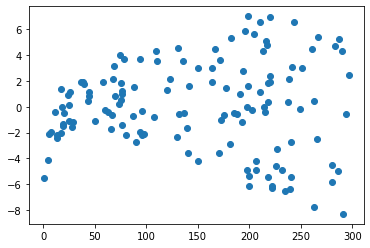

In [115]:
plt.scatter(X_train, res)
plt.show()


In [116]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)


In [117]:
y_pred

array([15.22457529,  7.53870963,  8.41407105, 19.07231779, 15.03699784,
       10.44375522, 11.24697147, 19.33204041, 12.06461675, 17.20616268,
       13.83457831, 16.18651091, 12.70430395, 12.55520392, 13.99810736,
        8.96237436, 20.4334567 , 14.41173968,  8.0292968 , 11.4393586 ,
        9.44815185,  9.82811642, 14.2097332 , 18.63463708, 17.38893045,
       19.40899526,  7.50023221, 11.95399416, 10.52071007, 13.17084272,
        9.19804859, 12.76202008, 18.16328863, 18.66349515, 11.80008446,
       17.89875633, 20.65951158, 13.75762346, 16.16246252, 15.57568179,
       12.90631043,  7.93791292, 21.21262456, 13.82495895, 15.63820761,
       10.7563843 ,  8.64012592, 20.79899224,  7.54351931, 20.44307606,
       13.58447504, 19.88034372, 16.01817218,  9.69825511, 18.5432532 ,
        7.52909028, 20.28916636, 12.15600064, 12.4061039 , 18.09114345,
       18.19214669, 15.0899043 , 18.10557249, 16.94163038, 12.94478785,
       14.65703327])

In [118]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [119]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.928417868265206

In [121]:
r2 = r2_score(Y_test,y_pred)
r2

0.6307239734128611

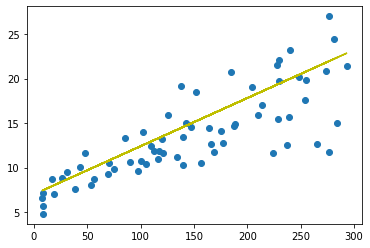

In [122]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()
